In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Exercise 1

In [2]:
from google.colab import files
uploaded = files.upload()

Saving delivery_time.csv to delivery_time.csv


In [3]:
df = pd.read_csv('delivery_time.csv')

In [4]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

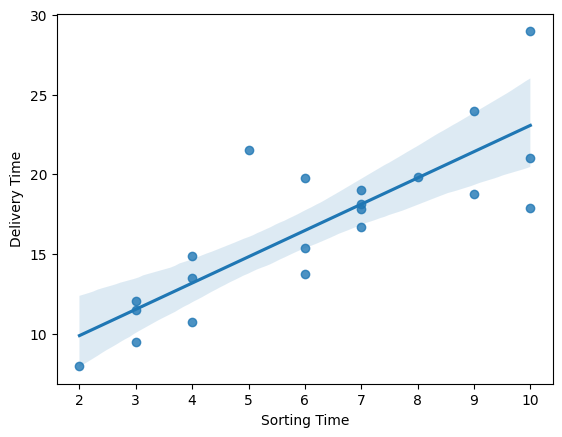

In [ ]:
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])

In [ ]:
#Since we have to predict delivery time using sorting time, sorting time will be the indepependant variable and delivery time will be dependant variable.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

array([[<Axes: title={'center': 'Delivery Time'}>,
        <Axes: title={'center': 'Sorting Time'}>]], dtype=object)

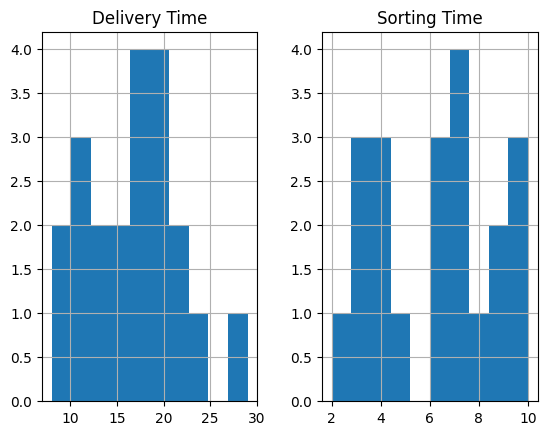

In [7]:
df.hist()

In [8]:
df['Sorting Time log'] = np.log2(df['Sorting Time'])

In [9]:
df.head()

,Delivery Time,Sorting Time,Sorting Time log
0,21.00,10,3.321928
1,13.50,4,2.000000
2,19.75,6,2.584963
3,24.00,9,3.169925
4,29.00,10,3.321928


In [12]:
df1 = df.rename({'Delivery Time': 'DT','Sorting Time log': 'STL'}, axis=1)

In [18]:
df1.sample(1)

,DT,Sorting Time,STL
13,11.5,3,1.584963


In [15]:
model = smf.ols('DT~STL',data=df1).fit()

In [16]:
model.params

Intercept    1.159684
STL          6.268417
dtype: float64

In [19]:
test_data = df1.sample(1)

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           2.64e-06
Time:                        11:25:56   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
STL            6.2684      0.952      6.587      0.000       4.277       8.260
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model.predict(test_data)

17    18.757354
dtype: float64

# Excercise 2

In [22]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [29]:
sal = pd.read_csv('Salary_Data.csv')

In [24]:
sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [25]:
sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

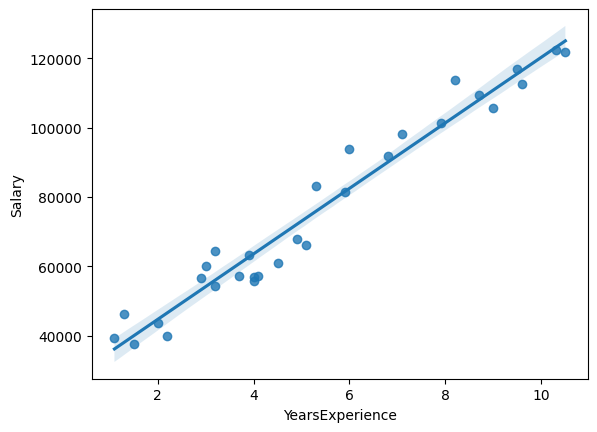

In [26]:
sns.regplot(x=sal['YearsExperience'],y=sal['Salary'])

array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

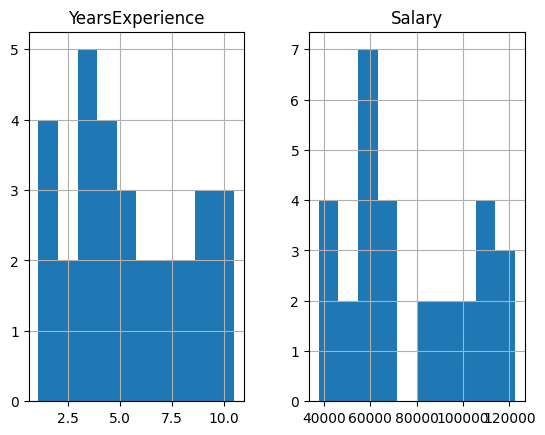

In [27]:
sal.hist()

In [30]:

sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [31]:
sal['YearsExperience log'] = np.log2(sal['YearsExperience'])
sal.head()

,YearsExperience,Salary,YearsExperience log
0,1.1,39343.0,0.137504
1,1.3,46205.0,0.378512
2,1.5,37731.0,0.584963
3,2.0,43525.0,1.000000
4,2.2,39891.0,1.137504


In [32]:
sal1 = sal.rename({'YearsExperience log': 'YEL'}, axis=1)

In [33]:
sal1.sample(1)

,YearsExperience,Salary,YEL
15,4.9,67938.0,2.292782


In [34]:
regmod = smf.ols('Salary~YEL',data=sal1).fit()

In [35]:
regmod.params

Intercept    14927.971770
YEL          28129.290536
dtype: float64

In [36]:
regmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           3.25e-13
Time:                        11:34:21   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
YEL         2.813e+04   2198.977     12.792      0.000    2.36e+04    3.26e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         7.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
test = sal1.sample(1)

In [38]:
regmod.predict(test)

28    109571.007247
dtype: float64